In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import integrate as integ
from scipy.optimize import curve_fit


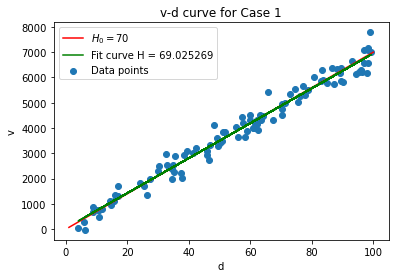

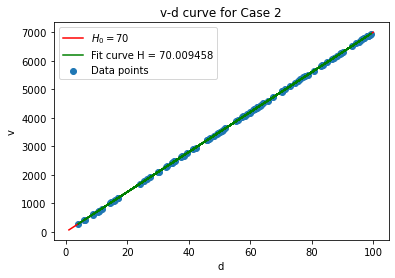

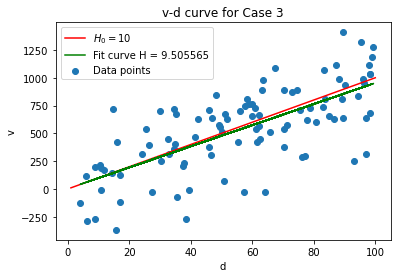

In [3]:
#Question 1

n = 100
H0 = np.array((70,70,10))
sig = np.array((300,10,300))
d = np.random.uniform(1,100,size = n)
vp=[]
x = np.linspace(1,100,200)
def f(x,a,b):
    return (a*x + b)

for i in range(3):
    vp.append(sig[i]* np.random.randn(n))
    plt.figure()
    plt.plot(x,H0[i]*x,label=r"$H_0 = %i$"%H0[i],color = "red")
    plt.scatter(d,H0[i]*d + vp[i],label="Data points")
    par, cov = curve_fit(f,d,H0[i]*d + vp[i])
    plt.plot(d,f(d,*par),label=r"Fit curve H = %f"%par[0],color="g")
    plt.title("v-d curve for Case %i"%(i+1))
    plt.ylabel("v")
    plt.xlabel("d")
    plt.legend()
    plt.show()


C:\Users\HARSHU~1\AppData\Local\Temp/ipykernel_1224/1175472242.py:45: RuntimeWarning: overflow encountered in double_scalars
  j = j*np.exp(H0**np.sqrt(ome[2])*(i-tml))
C:\Users\HARSHU~1\AppData\Local\Temp/ipykernel_1224/1175472242.py:45: RuntimeWarning: overflow encountered in exp
  j = j*np.exp(H0**np.sqrt(ome[2])*(i-tml))
C:\Users\HARSHU~1\AppData\Local\Temp/ipykernel_1224/1175472242.py:41: RuntimeWarning: invalid value encountered in double_scalars
  j = ((3*(1+w)/2)*((i-tml)*H0*np.sqrt(ome[2])) + (aeq[1])**(3*(1+w)/2))**(2/(3*(1+w)))
C:\Users\HARSHU~1\AppData\Local\Temp/ipykernel_1224/1175472242.py:45: RuntimeWarning: overflow encountered in exp
  j = j*np.exp(H0**np.sqrt(ome[2])*(i-tml))
C:\Users\HARSHU~1\AppData\Local\Temp/ipykernel_1224/1175472242.py:50: RuntimeWarning: overflow encountered in double_scalars
  j = j*np.exp(H0*np.sqrt(153.228)*np.sqrt(ome[2])*(i))
C:\Users\HARSHU~1\AppData\Local\Temp/ipykernel_1224/1175472242.py:50: RuntimeWarning: overflow encountered in exp
  

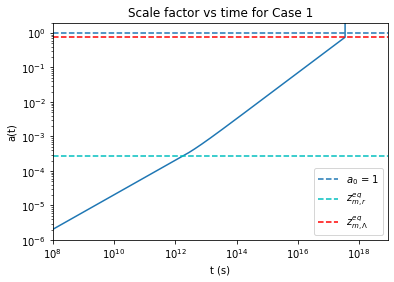

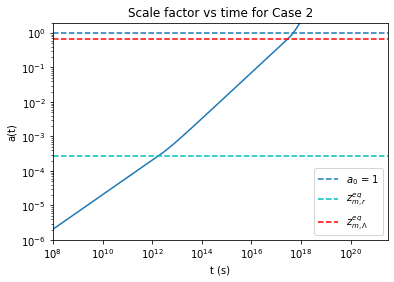

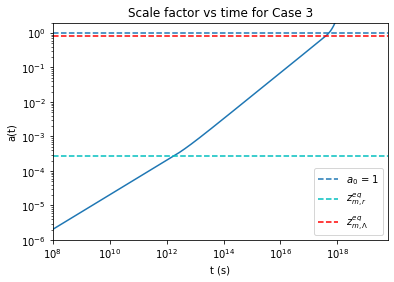

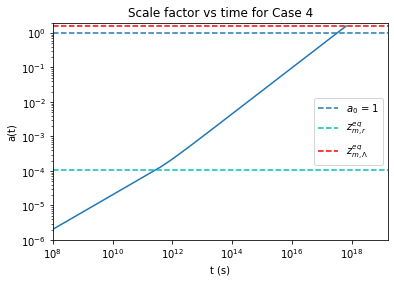

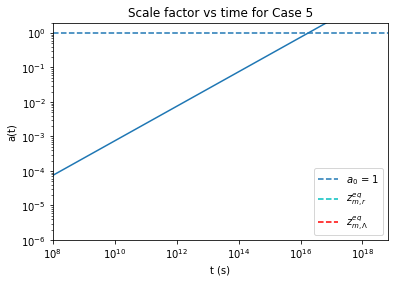

In [4]:
#Question 3
ome = ([0.3,8.4*10**(-5),0.7],[0.3,8.4*10**(-5),0.7],[0.3,8.4*10**(-5),0.7],[0.8,8.4*10**(-5),0.2],[0.3,8.4*10**(-5)*((100/2.7255)**4),0.7] )
zeq = ([3570.42,3570.42,3570.42,9522.81,-0.74],[0.33,0.497,0.265,-0.37,-0.74])
aeq = 1/(1 + np.asarray(zeq))

teq = ()
w = [-1,-0.7,-1.2,-1,-1]
H0 = 70/(3.086*10**(19))
t = []
i = 1e-10
while (i < 1e20):
    t.append(i)
    i = i*1.0005

t = np.asarray(t)
tmr = np.zeros(5)
tml = np.zeros(5)

def sca(aeq,w,ome):
    a = np.zeros(np.size(t))
    j = 0
    h = 0
    for i in t:
        if j <= aeq[0] and aeq[0]!=aeq[1]:
            j = np.sqrt(2*i*H0*np.sqrt(ome[1]))
            a[h] = j
            h = h + 1
            tmr = i
        elif j <= aeq[0] and aeq[0]==aeq[1]:
            j = np.sqrt(2*i*H0*np.sqrt(153.228))
            a[h] = j
            h = h + 1
            tmr = 0
            
        elif j < aeq[1] and aeq[0]!=aeq[1]:
            j = (1.5*H0*np.sqrt(ome[0])*(i - tmr) + (aeq[0])**(3/2))**(2/3)
            a[h] = j
            h = h + 1
            tml = i
        elif w!=-1:
            j = ((3*(1+w)/2)*((i-tml)*H0*np.sqrt(ome[2])) + (aeq[1])**(3*(1+w)/2))**(2/(3*(1+w)))
            a[h] = j
            h = h + 1
        elif w==-1 and aeq[0]!=aeq[1]:
            j = j*np.exp(H0**np.sqrt(ome[2])*(i-tml))
            a[h] = j
            h = h + 1
        
        elif w==-1 and aeq[0]==aeq[1]:
            j = j*np.exp(H0*np.sqrt(153.228)*np.sqrt(ome[2])*(i))
            a[h] = j
            h = h + 1
            tml = 0 
        
    return a,tmr,tml

for i in range(5):
    plt.figure()
    scale,tmr[i],tml[i] = sca(aeq[:,i],w[i],ome[i])
    plt.loglog(t,scale)
    plt.ylim(1e-6,2)
    plt.xlim(1e8)
    plt.axhline(y=1, linestyle = "--",label=r"$a_0$ = 1") 
    plt.axhline(y=aeq[0][i], linestyle = "--",color = "c",label = r"$z_{m,r}^{eq}$")
    plt.axhline(y=aeq[1][i], linestyle = "--",color="r",label = r"$z_{m,\Lambda}^{eq}$")
    plt.title("Scale factor vs time for Case %i"%(i+1))
    plt.xlabel("t (s)")
    plt.ylabel("a(t)")
    plt.legend()

plt.show()

In [5]:

#Question 5

def age(z,zeq,ome,w,tmr,tml):
    if z >= zeq[0] and zeq[0]!=zeq[1]:
        return 1/(2*H0*np.sqrt(ome[1])*((1 + z)**(2))) 
    elif z>= zeq[0] and zeq[0]==zeq[1]:
        return 1/(2*H0*np.sqrt(153.228)*((1 + z)**(2)))
    elif z < zeq[0] and z >= zeq[1] and zeq[0] != zeq[1]:
        return (2/(3*H0*np.sqrt(ome[0])))*((1 + z)**(-1.5) - (1 + zeq[0])**(-1.5)) + tmr 
    elif w!=-1 and z < zeq[1] :
        return (1/((3*(1+w)/2)*H0*np.sqrt(ome[0])))*((1 + z)**(-3*(1+w)/2) - (1 + zeq[1])**(-3*(1+w)/2)) + tml 
    elif  w==-1 and z < zeq[1] and zeq[0]!= zeq[1]:
        return np.log((1+zeq[1])/(1 + z))*(1/(H0*np.sqrt(ome[1]))) + tml

   
        

For case 1 , the age of universe in seconds at z = 0 is 1.4067377743594635e+19
For case 1 , the age of universe in seconds at z = 2 is 1.0326697857802392e+17
For case 1 , the age of universe in seconds at z = 6 is 2.8972736446833016e+16
For case 1 , the age of universe in seconds at z = 1100 is 14059681098978.09
For case 2 , the age of universe in seconds at z = 0 is 5.899377836498337e+17
For case 2 , the age of universe in seconds at z = 2 is 1.0326697857802392e+17
For case 2 , the age of universe in seconds at z = 6 is 2.8972736446833016e+16
For case 2 , the age of universe in seconds at z = 1100 is 14059681098978.09
For case 3 , the age of universe in seconds at z = 0 is 5.7332327994456576e+17
For case 3 , the age of universe in seconds at z = 2 is 1.0326697857802392e+17
For case 3 , the age of universe in seconds at z = 6 is 2.8972736446833016e+16
For case 3 , the age of universe in seconds at z = 1100 is 14059681098978.09
For case 4 , the age of universe in seconds at z = 0 is 3.2

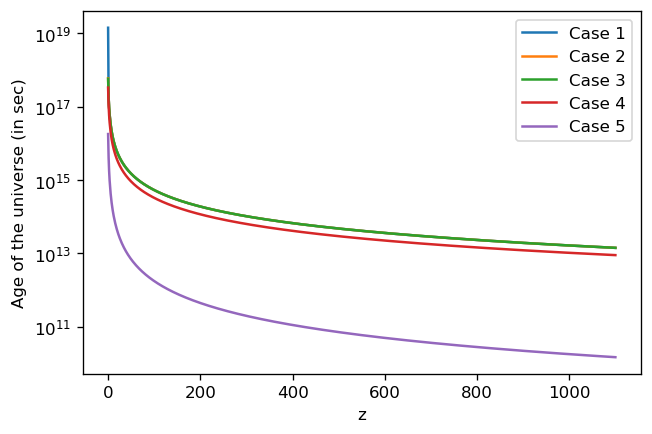

In [6]:
z = np.array((0,2,6,1100))
x = np.linspace(0,1100,1000)
zeq = np.array(zeq)
        
for i in range(5):
    for j in z:
        print("For case %i , the age of universe in seconds at z = %i is"%(i+1,j),age(j,zeq[:,i],ome[i],w[i],tmr[i],tml[i]))
        
ages = np.zeros((5,1000))
plt.figure(dpi=120)
for k in range(5):
    for i,ix in enumerate(x):
        ages[k][i] = age(ix,zeq[:,k],ome[k],w[k],tmr[k],tml[k])
    plt.semilogy(x,ages[k],label="Case %i"%(k+1))
plt.xlabel("z")
plt.ylabel("Age of the universe (in sec)")
plt.legend()

For case 1 , the lookback time in seconds at z = 0 is 0.0
For case 1 , the lookback time in seconds at z = 2 is 1.396411076501661e+19
For case 1 , the lookback time in seconds at z = 6 is 1.4038405007147803e+19
For case 1 , the lookback time in seconds at z = 1100 is 1.4067363683913535e+19
For case 2 , the lookback time in seconds at z = 0 is 0.0
For case 2 , the lookback time in seconds at z = 2 is 4.866708050718098e+17
For case 2 , the lookback time in seconds at z = 6 is 5.609650472030007e+17
For case 2 , the lookback time in seconds at z = 1100 is 5.899237239687347e+17
For case 3 , the lookback time in seconds at z = 0 is 0.0
For case 3 , the lookback time in seconds at z = 2 is 4.700563013665418e+17
For case 3 , the lookback time in seconds at z = 6 is 5.4435054349773274e+17
For case 3 , the lookback time in seconds at z = 1100 is 5.7330922026346675e+17
For case 4 , the lookback time in seconds at z = 0 is 0.0
For case 4 , the lookback time in seconds at z = 2 is 2.653572772522913

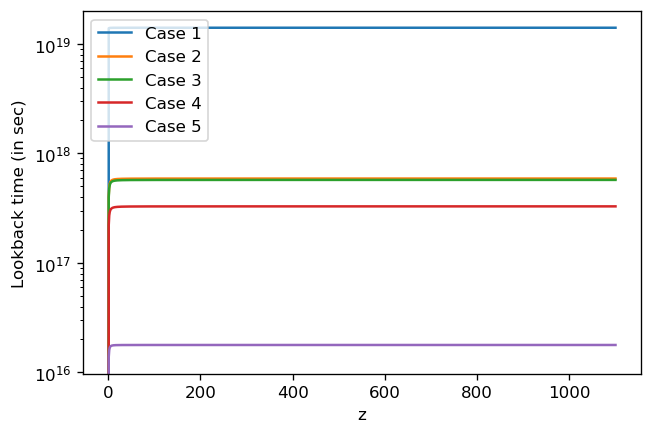

In [7]:
#Question 6
plt.figure(dpi=120)
for i in range(5):
    for j in z:
        print("For case %i , the lookback time in seconds at z = %i is"%(i+1,j),age(0,zeq[:,i],ome[i],w[i],tmr[i],tml[i]) - age(j,zeq[:,i],ome[i],w[i],tmr[i],tml[i]))
lb = np.zeros((5,1000))
for k in range(5):
    for i,ix in enumerate(x):
        lb[k][i] = age(0,zeq[:,k],ome[k],w[k],tmr[k],tml[k]) - age(ix,zeq[:,k],ome[k],w[k],tmr[k],tml[k])
    
    plt.semilogy(x,lb[k],label="Case %i"%(k+1))
plt.xlabel("z")
plt.ylabel("Lookback time (in sec)")

plt.legend()

For case 1 , the conformal time in seconds at z = 0 is 1.4570662866586993e+18
For case 1 , the conformal time in seconds at z = 2 is 9.238622671757802e+17
For case 1 , the conformal time in seconds at z = 6 is 6.081458242512462e+17
For case 1 , the conformal time in seconds at z = 1100 is 4.851472684323308e+16
For case 2 , the conformal time in seconds at z = 0 is 1.4073015198720904e+18
For case 2 , the conformal time in seconds at z = 2 is 9.104184962614797e+17
For case 2 , the conformal time in seconds at z = 6 is 6.061838640711437e+17
For case 2 , the conformal time in seconds at z = 1100 is 4.8514722392078984e+16
For case 3 , the conformal time in seconds at z = 0 is 1.478603005385308e+18
For case 3 , the conformal time in seconds at z = 2 is 9.269191789185267e+17
For case 3 , the conformal time in seconds at z = 6 is 6.083622048004637e+17
For case 3 , the conformal time in seconds at z = 1100 is 4.851472684921483e+16
For case 4 , the conformal time in seconds at z = 0 is 9.6974282

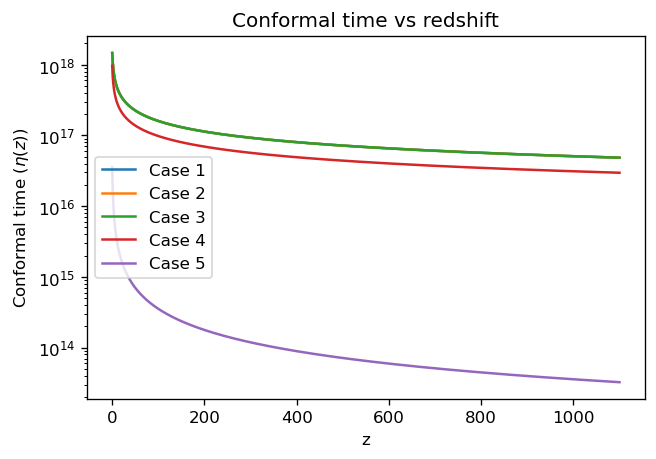

In [8]:
#Question 7
N = 2000
q = np.linspace(0,1100,N)
ct = []
ct.append(lambda x: (1/H0)*( 0.7 + 0.3*(1 + x)**(3))**(-0.5))
ct.append(lambda x: (1/H0)*( 0.7*(1 + x)**0.9 + 0.3*(1 + x)**(3))**(-0.5))
ct.append(lambda x: (1/H0)*( 0.7*(1 + x)**(-0.6) + 0.3*(1 + x)**(3))**(-0.5))
ct.append(lambda x: (1/H0)*( 0.2 + 0.8*(1 + x)**(3))**(-0.5))
ct.append(lambda x: (1/(np.sqrt(152.228)*H0))*((1 + x)**(-2)))

conf_z = np.zeros((5,4)) 
plt.figure(dpi=120)
conf = np.zeros((5,N))
for j in range(5):
    for ind,k in enumerate(z):
        conf_z[j][ind] = integ.quad(ct[j],k,np.inf)[0]
        print("For case %i , the conformal time in seconds at z = %i is"%(j+1,k),conf_z[j,ind])
    n = 0
    for i in q:
        conf[j,n] = (integ.quad(ct[j], i, np.inf)[0])
        n = n+1
    plt.semilogy(q,conf[j],label = "Case %i"%(j+1))
    

plt.title("Conformal time vs redshift")
plt.xlabel("z")
plt.ylabel(r"Conformal time ($\eta(z)$)")
plt.legend()

For case 1 , the proper distance / comoving distance at the current time in metres at z = 0 is  0.0
For case 1 , the luminosity distance in metres at z = 0 is  0.0
For case 1 , the angular diameter distance in metres at z = 0 is  0.0
For case 1 , the proper distance / comoving distance at the current time in metres at z = 2 is  1.599612058448757e+26
For case 1 , the luminosity distance in metres at z = 2 is  4.798836175346271e+26
For case 1 , the angular diameter distance in metres at z = 2 is  5.33204019482919e+25
For case 1 , the proper distance / comoving distance at the current time in metres at z = 6 is  2.546761387222359e+26
For case 1 , the luminosity distance in metres at z = 6 is  1.7827329710556514e+27
For case 1 , the angular diameter distance in metres at z = 6 is  3.6382305531747986e+25
For case 1 , the proper distance / comoving distance at the current time in metres at z = 1100 is  4.225654679446399e+26
For case 1 , the luminosity distance in metres at z = 1100 is  4.652

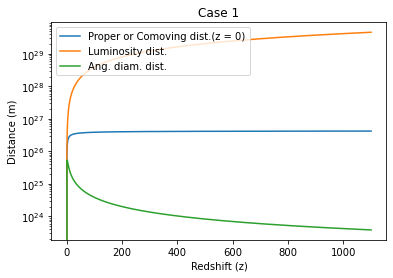

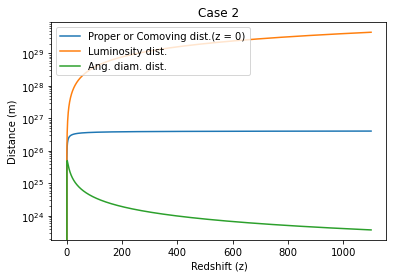

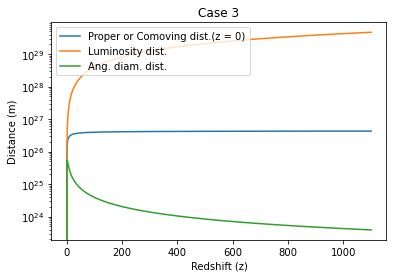

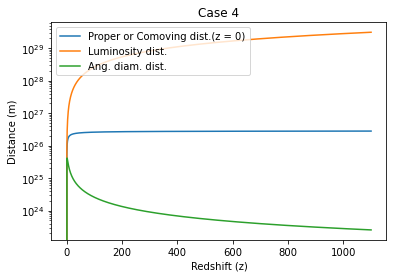

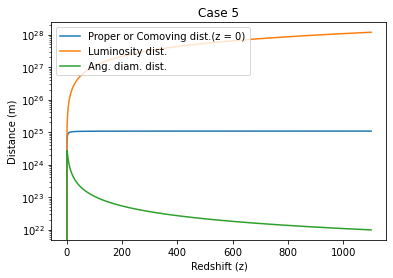

<Figure size 432x288 with 0 Axes>

In [9]:
#Question 8
c = 3*10**(8)
pd = np.zeros((5,N))
pd_z = np.zeros((5,4))
ld = np.zeros((5,N))
ld_z = np.zeros((5,4))
ad = np.zeros((5,N))
ad_z = np.zeros((5,4))
cd = np.zeros((5,N))
cd_z = np.zeros((5,4))
hd = np.zeros(5)
for j in range(5):
    for k in range(N):
        pd[j,k] = 1*c*(conf[j,0] - conf[j,k])
        ld[j,k] = (1 + q[k])*pd[j,k]
        ad[j,k] = pd[j,k] / (1 + q[k])
        cd[j,k] = 1*pd[j,k]
        
        
    for k in range(4):
        pd_z[j,k] = 1 * c*(conf_z[j,0] - conf_z[j,k])
        ld_z[j,k] = (1 + z[k])*pd_z[j,k]
        ad_z[j,k] = pd_z[j,k] / (1 + z[k])
        cd_z[j,k] = 1*pd_z[j,k]
        
    hd[j] = c*conf_z[j,0]
        

for j in range(5):
    for ind,k in enumerate(z):
        print("For case %i , the proper distance / comoving distance at the current time in metres at z = %i is "%(j+1,k),pd_z[j,ind])
        print("For case %i , the luminosity distance in metres at z = %i is "%(j+1,k),ld_z[j,ind])
        print("For case %i , the angular diameter distance in metres at z = %i is "%(j+1,k),ad_z[j,ind])
        
    plt.title("Case %i"%(j+1))
    plt.semilogy(q,pd[j],label = "Proper or Comoving dist.(z = 0)")
    plt.semilogy(q,ld[j],label = "Luminosity dist.")
    plt.semilogy(q,ad[j],label = "Ang. diam. dist.")
    plt.xlabel("Redshift (z)")
    plt.ylabel("Distance (m)")
    plt.legend()
    plt.figure()



(1e+24, 1e+27)

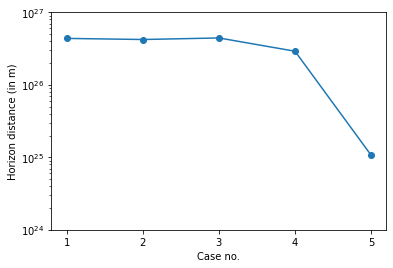

In [355]:
plt.semilogy([1,2,3,4,5],hd,"o-")
plt.xticks([1,2,3,4,5])
plt.ylabel("Horizon distance (in m)")
plt.xlabel("Case no.")
plt.ylim(1e24,1e27)

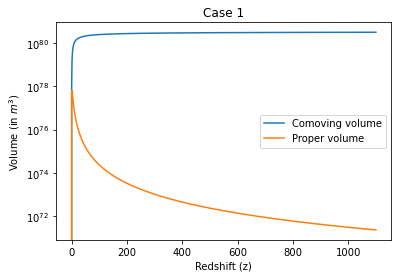

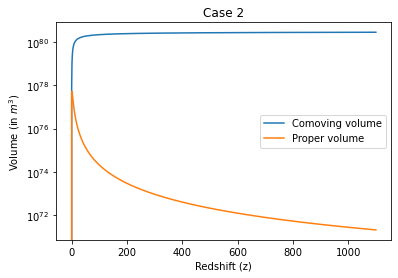

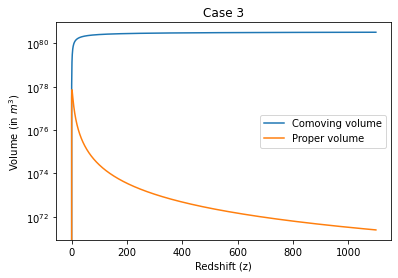

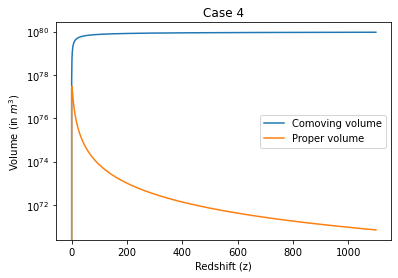

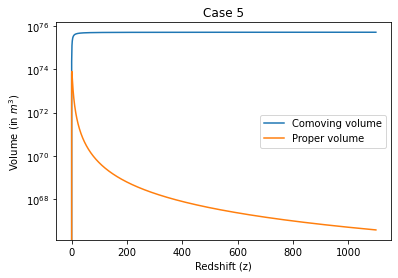

<Figure size 432x288 with 0 Axes>

In [17]:
#Question 9
cv = (4/3)*np.pi*(pd)**3
pv = ((1 + q)**(-3))*pv
for i in range(5):
    plt.semilogy(q,cv[i],label="Comoving volume")
    plt.semilogy(q,pv[i],label="Proper volume")
    plt.title("Case %i"%(i+1))
    plt.xlabel("Redshift (z)")
    plt.ylabel(r"Volume (in $m^3$)")
   
    plt.legend()
    plt.figure()
    

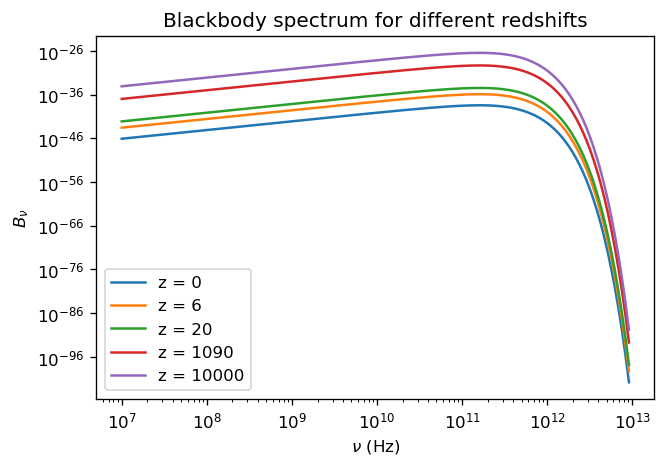

In [357]:
#Question 12

qb = 1
f = []

while(qb < 1e6):
    f.append(qb)
    qb = qb*1.1
f = np.asarray(f)

z = [0,6,20,1090,1e4]

def bb(f,z):
    h = (6.626)*10**(-34)
    c = (3*10**8)
    T = 2.7255
    k = 1.38*10**(-23)
    t = ((np.exp(h*f/(k*T)))**(10000000) - 1)   
    return (2*h*f**3*(1+z)**3) / ((c**2)*t)
plt.figure(dpi=120)
for i in range(5):
    plt.loglog(10000000*f,bb(f,z[i]),label ="z = %i"%z[i] )


plt.title("Blackbody spectrum for different redshifts")
plt.xlabel(r"$\nu$ (Hz)")
plt.ylabel(r"$B_\nu$")
plt.legend()
plt.show()

C:\Users\HARSHU~1\AppData\Local\Temp/ipykernel_8400/3182997898.py:4: RuntimeWarning: divide by zero encountered in log10
  derr = np.abs(0.04*ld[0]*(5 - 5*np.log10(ld[0]) + m[i]))
C:\Users\HARSHU~1\AppData\Local\Temp/ipykernel_8400/3182997898.py:4: RuntimeWarning: invalid value encountered in multiply
  derr = np.abs(0.04*ld[0]*(5 - 5*np.log10(ld[0]) + m[i]))
C:\Users\HARSHU~1\AppData\Local\Temp/ipykernel_8400/3182997898.py:4: RuntimeWarning: divide by zero encountered in log10
  derr = np.abs(0.04*ld[0]*(5 - 5*np.log10(ld[0]) + m[i]))
C:\Users\HARSHU~1\AppData\Local\Temp/ipykernel_8400/3182997898.py:4: RuntimeWarning: invalid value encountered in multiply
  derr = np.abs(0.04*ld[0]*(5 - 5*np.log10(ld[0]) + m[i]))
C:\Users\HARSHU~1\AppData\Local\Temp/ipykernel_8400/3182997898.py:4: RuntimeWarning: divide by zero encountered in log10
  derr = np.abs(0.04*ld[0]*(5 - 5*np.log10(ld[0]) + m[i]))
C:\Users\HARSHU~1\AppData\Local\Temp/ipykernel_8400/3182997898.py:4: RuntimeWarning: invalid val

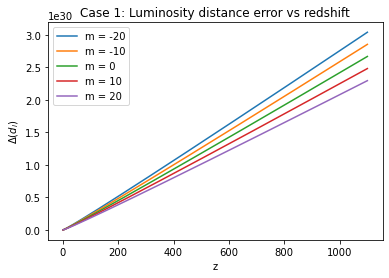

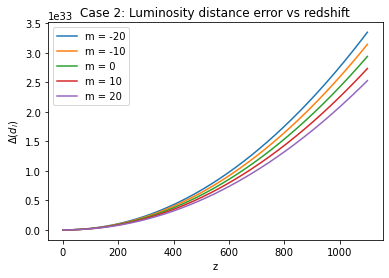

In [359]:

#Question 13
m = [-20,-10,0,10,20]
for i in range(5):
    derr = np.abs(0.04*ld[0]*(5 - 5*np.log10(ld[0]) + m[i]))
    plt.plot(q,derr,label="m = %i"%m[i])
    
plt.legend()
plt.xlabel("z")
plt.ylabel(r"$\Delta(d_l)$")
plt.title("Case 1: Luminosity distance error vs redshift")
plt.figure()
for i in range(5):
    derr = np.abs(0.04*ld[0]*(1 + q)*(5 - 5*np.log10(ld[0]) + m[i]))
    plt.plot(q,derr,label="m = %i"%m[i])
plt.legend()
plt.xlabel("z")
plt.ylabel(r"$\Delta(d_l)$")
plt.title("Case 2: Luminosity distance error vs redshift")
plt.show()